In [40]:
#Change the weightage variable to get better outcome
XGB1_WEIGHT = 0.35
LGB1_WEIGHT = 0.55
CAT1_WEIGHT = 0.75
NEURAL1_WEIGHT = 1

In [9]:
### Import required libraries

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import sklearn
from sklearn.model_selection import train_test_split

import lightgbm as lgb
import xgboost as xgb
from catboost import CatBoostRegressor

from IPython.display import display # Allows the use of display() for DataFrames

import warnings
warnings.filterwarnings('ignore')


In [10]:
# Read train and test files
train_df = pd.read_csv(r'C:\Users\Anshul.Roy\Desktop\My Blog\Hands on SkLearn and Tensorflow\Standard Bank/train.csv')
test_df = pd.read_csv(r'C:\Users\Anshul.Roy\Desktop\My Blog\Hands on SkLearn and Tensorflow\Standard Bank/test.csv')

In [11]:
train_df.head(10)

,ID,target,48df886f9,0deb4b6a8,34b15f335,a8cb14b00,2f0771a37,30347e683,d08d1fbe3,6ee66e115,...,3ecc09859,9281abeea,8675bec0b,3a13ed79a,f677d4d13,71b203550,137efaa80,fb36b89d9,7e293fbaf,9fc776466
0,000d6aaf2,38000000.0,0.0,0,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
1,000fbd867,600000.0,0.0,0,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
2,0027d6b71,10000000.0,0.0,0,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
3,0028cbf45,2000000.0,0.0,0,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
4,002a68644,14400000.0,0.0,0,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
5,002dbeb22,2800000.0,0.0,0,0.0,0,0,0,0,0,...,12000.0,5600000.0,20000000.0,0,0,0,0,0,0,11000
6,003925ac6,164000.0,0.0,0,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,40000,0,0,0
7,003eb0261,600000.0,0.0,0,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
8,004b92275,979000.0,0.0,0,0.0,0,0,0,0,0,...,0.0,0.0,4000000.0,0,0,0,0,0,0,0
9,0067b4fef,460000.0,0.0,0,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,0,0,0,400000


In [12]:
test_df.head(10)

,ID,48df886f9,0deb4b6a8,34b15f335,a8cb14b00,2f0771a37,30347e683,d08d1fbe3,6ee66e115,20aa07010,...,3ecc09859,9281abeea,8675bec0b,3a13ed79a,f677d4d13,71b203550,137efaa80,fb36b89d9,7e293fbaf,9fc776466
0,000137c73,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,00021489f,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0004d7953,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,00056a333,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,00056d8eb,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0005fc190,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,000787e86,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0008510a0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,000895faf,0.0,0.0,2.461712e+07,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,000986fba,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,12675000.0,...,0.0,0.0,13333333.34,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4459 entries, 0 to 4458
Columns: 4993 entries, ID to 9fc776466
dtypes: float64(1845), int64(3147), object(1)
memory usage: 169.9+ MB


In [14]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49342 entries, 0 to 49341
Columns: 4992 entries, ID to 9fc776466
dtypes: float64(4991), object(1)
memory usage: 1.8+ GB


In [15]:
#### Check if there are any NULL values in Train Data
print("Total Train Features with NaN Values = " + str(train_df.columns[train_df.isnull().sum() != 0].size))
if (train_df.columns[train_df.isnull().sum() != 0].size):
    print("Features with NaN => {}".format(list(train_df.columns[train_df.isnull().sum() != 0])))
    train_df[train_df.columns[train_df.isnull().sum() != 0]].isnull().sum().sort_values(ascending = False)

Total Train Features with NaN Values = 0


In [16]:
#### Check if there are any NULL values in Test Data
print("Total Test Features with NaN Values = " + str(test_df.columns[test_df.isnull().sum() != 0].size))
if (test_df.columns[test_df.isnull().sum() != 0].size):
    print("Features with NaN => {}".format(list(test_df.columns[test_df.isnull().sum() != 0])))
    test_df[test_df.columns[test_df.isnull().sum() != 0]].isnull().sum().sort_values(ascending = False)

Total Test Features with NaN Values = 0


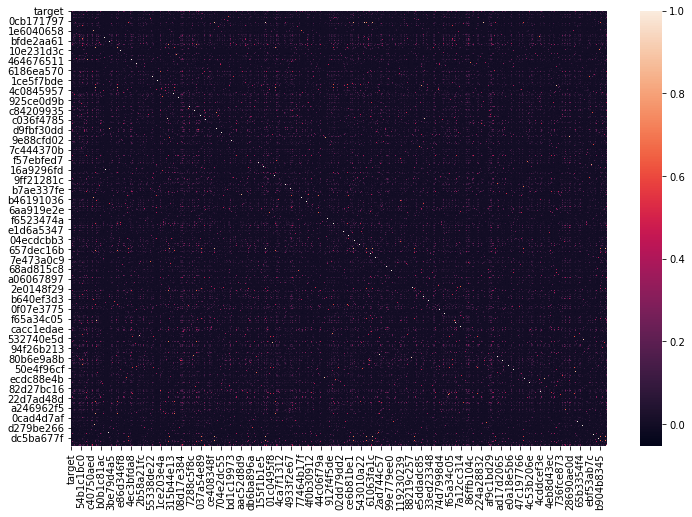

<Figure size 432x288 with 0 Axes>

In [46]:
#EDA
#Identify numerical columns to produce a heatmap
catcols = [col for col in train_df.columns if train_df[col].dtype == 'object']
numcols = [col for col in train_df.columns if col not in catcols]

#Lets start by plotting a heatmap to determine if any variables are correlated
plt.figure(figsize = (12,8))
sns.heatmap(data=train_df[numcols].corr())
plt.show()
plt.gcf().clear()

In [17]:
X_train = train_df.drop(["ID", "target"], axis=1)
y_train = np.log1p(train_df["target"].values)

X_test = test_df.drop(["ID"], axis=1)

In [18]:
dev_X, val_X, dev_y, val_y = sklearn.model_selection.train_test_split(X_train, y_train, test_size = 0.2, random_state = 42)

In [19]:
def run_lgb1(train_X, train_y, val_X, val_y, test_X):
    params = {
        "objective" : "regression",
        "metric" : "rmse",
        "num_leaves" : 40,
        "learning_rate" : 0.005,
        "bagging_fraction" : 0.7,
        "feature_fraction" : 0.5,
        "bagging_frequency" : 5,
        "bagging_seed" : 42,
        "verbosity" : -1,
        "seed": 42
    }
    
    lgtrain = lgb.Dataset(train_X, label=train_y)
    lgval = lgb.Dataset(val_X, label=val_y)
    evals_result = {}
    model = lgb.train(params, lgtrain, 5000, 
                      valid_sets=[lgval], 
                      early_stopping_rounds=100, 
                      verbose_eval=50, 
                      evals_result=evals_result)
    
    pred_test_y = np.expm1(model.predict(test_X, num_iteration=model.best_iteration))
    return pred_test_y, model, evals_result

# Training LGB
pred_test_lgb1, model_lgb1, evals_result_lgb1 = run_lgb1(dev_X, dev_y, val_X, val_y, X_test)
print("LightGBM1 Training Completed...")

Training until validation scores don't improve for 100 rounds.
[50]	valid_0's rmse: 1.61862
[100]	valid_0's rmse: 1.55904
[150]	valid_0's rmse: 1.51633
[200]	valid_0's rmse: 1.48392
[250]	valid_0's rmse: 1.46091
[300]	valid_0's rmse: 1.444
[350]	valid_0's rmse: 1.43346
[400]	valid_0's rmse: 1.42565
[450]	valid_0's rmse: 1.42068
[500]	valid_0's rmse: 1.41726
[550]	valid_0's rmse: 1.41394
[600]	valid_0's rmse: 1.41119
[650]	valid_0's rmse: 1.40985
[700]	valid_0's rmse: 1.40957
[750]	valid_0's rmse: 1.40933
Early stopping, best iteration is:
[687]	valid_0's rmse: 1.40919
LightGBM1 Training Completed...


In [20]:
#LGBM New
def run_lgb2(train_X, train_y, val_X, val_y, test_X):
    params = {
        "objective" : "regression",
        "metric" : "rmse",
        "num_leaves" : 40,
        "learning_rate" : 0.0021,
        "bagging_fraction" : 0.7,
        "feature_fraction" : 0.3,
        "bagging_frequency" : 5,
        "bagging_seed" : 42,
        "verbosity" : -1,
        "seed": 42,
        "feature_fraction_seed" : 2,
        "sub_feature" : 0.345
  
    }
    
    lgtrain = lgb.Dataset(train_X, label=train_y)
    lgval = lgb.Dataset(val_X, label=val_y)
    evals_result = {}
    model = lgb.train(params, lgtrain, 10000, 
                      valid_sets=[lgval], 
                      early_stopping_rounds=100, 
                      verbose_eval=50, 
                      evals_result=evals_result)
    
    pred_test_y = np.expm1(model.predict(test_X, num_iteration=model.best_iteration))
    return pred_test_y, model, evals_result

# Training LGB
pred_test_lgb2, model_lgb2, evals_result_lgb2 = run_lgb2(dev_X, dev_y, val_X, val_y, X_test)
print("LightGBM2 Training Completed...") 

Training until validation scores don't improve for 100 rounds.
[50]	valid_0's rmse: 1.66126
[100]	valid_0's rmse: 1.63031
[150]	valid_0's rmse: 1.60262
[200]	valid_0's rmse: 1.57866
[250]	valid_0's rmse: 1.55684
[300]	valid_0's rmse: 1.53754
[350]	valid_0's rmse: 1.52033
[400]	valid_0's rmse: 1.50518
[450]	valid_0's rmse: 1.49234
[500]	valid_0's rmse: 1.48089
[550]	valid_0's rmse: 1.47088
[600]	valid_0's rmse: 1.46159
[650]	valid_0's rmse: 1.45333
[700]	valid_0's rmse: 1.44643
[750]	valid_0's rmse: 1.44004
[800]	valid_0's rmse: 1.43489
[850]	valid_0's rmse: 1.42968
[900]	valid_0's rmse: 1.42528
[950]	valid_0's rmse: 1.42158
[1000]	valid_0's rmse: 1.41845
[1050]	valid_0's rmse: 1.416
[1100]	valid_0's rmse: 1.41339
[1150]	valid_0's rmse: 1.41143
[1200]	valid_0's rmse: 1.40957
[1250]	valid_0's rmse: 1.4081
[1300]	valid_0's rmse: 1.40685
[1350]	valid_0's rmse: 1.40598
[1400]	valid_0's rmse: 1.40512
[1450]	valid_0's rmse: 1.40446
[1500]	valid_0's rmse: 1.4039
[1550]	valid_0's rmse: 1.40316


In [21]:
# feature importance
print("Features Importance...")
gain = model_lgb1.feature_importance('gain')
featureimp = pd.DataFrame({'feature':model_lgb1.feature_name(), 
                   'split':model_lgb1.feature_importance('split'), 
                   'gain':100 * gain / gain.sum()}).sort_values('gain', ascending=False)
print(featureimp[:15])

Features Importance...
        feature      gain  split
4358  f190486d6  7.976637    586
2500  58e2e02e6  5.120466    554
3660  eeb9cd3aa  4.789270    506
4243  15ace8c9f  3.331270    439
2755  9fd594eec  3.111541    259
8     20aa07010  2.185156    316
878   6eef030c1  1.549627    257
3771  58232a6fb  1.401872    283
1530  b43a7cfd5  1.212928    293
3866  491b9ee45  1.134372    236
2835  fb0f5dbfe  1.127745    321
1556  024c577b9  1.079821    211
4581  1702b5bf0  0.854425    212
4084  2288333b4  0.853516    120
3397  ced6a7e91  0.850369    210


In [22]:
def run_xgb1(train_X, train_y, val_X, val_y, test_X):
    params = {'objective': 'reg:linear', 
          'eval_metric': 'rmse',
          'eta': 0.005,
          'max_depth': 10, 
          'subsample': 0.7, 
          'colsample_bytree': 0.5,
          'alpha':0,
          'random_state': 42, 
          'silent': True}
    
    tr_data = xgb.DMatrix(train_X, train_y)
    va_data = xgb.DMatrix(val_X, val_y)
    
    watchlist = [(tr_data, 'train'), (va_data, 'valid')]
    
    model_xgb = xgb.train(params, tr_data, 2000, watchlist, maximize=False, early_stopping_rounds = 30, verbose_eval=50)
    
    dtest = xgb.DMatrix(test_X)
    xgb_pred_y = np.expm1(model_xgb.predict(dtest, ntree_limit=model_xgb.best_ntree_limit))
    
    return xgb_pred_y, model_xgb
# Training XGB
pred_test_xgb1, model_xgb1 = run_xgb1(dev_X, dev_y, val_X, val_y, X_test)
print("XGB1 Training Completed...")

[0]	train-rmse:14.0323	valid-rmse:14.0214
Multiple eval metrics have been passed: 'valid-rmse' will be used for early stopping.

Will train until valid-rmse hasn't improved in 30 rounds.
[50]	train-rmse:10.9748	valid-rmse:10.9616
[100]	train-rmse:8.60695	valid-rmse:8.59385
[150]	train-rmse:6.77334	valid-rmse:6.76568
[200]	train-rmse:5.35712	valid-rmse:5.36137
[250]	train-rmse:4.26509	valid-rmse:4.28712
[300]	train-rmse:3.42653	valid-rmse:3.47036
[350]	train-rmse:2.78679	valid-rmse:2.86115
[400]	train-rmse:2.30236	valid-rmse:2.41199
[450]	train-rmse:1.94033	valid-rmse:2.09095
[500]	train-rmse:1.67306	valid-rmse:1.86723
[550]	train-rmse:1.47815	valid-rmse:1.71487
[600]	train-rmse:1.33721	valid-rmse:1.61388
[650]	train-rmse:1.23683	valid-rmse:1.54761
[700]	train-rmse:1.16459	valid-rmse:1.50557
[750]	train-rmse:1.11151	valid-rmse:1.47801
[800]	train-rmse:1.07384	valid-rmse:1.46049
[850]	train-rmse:1.04407	valid-rmse:1.4496
[900]	train-rmse:1.02263	valid-rmse:1.44213
[950]	train-rmse:1.0042

In [23]:
#XGB New
def run_xgb2(train_X, train_y, val_X, val_y, test_X):
    params = {'objective': 'reg:linear', 
                    #reg:linear” –linear regression
                    #reg:logistic” –logistic regression
                    #binary:logistic” –logistic regression for binary classification, output probability
                    #“multi:softmax” –set XGBoost to do multiclass classification using the softmax objective, you also need to set num_class(number of classes)
          'eval_metric': 'mae',
                          #“rmse”: root mean square error
                          #“mae”: mean absolute error
                          #“logloss”: negative log-likelihood
                          #“error”: Binary classification error rate. It is calculated as #(wrong cases)/#(all cases). For the predictions, the evaluation will regard the instances with prediction value larger than 0.5 as positive instances, and the others as negative instances.
                          #“merror”: Multiclass classification error rate. It is calculated as #(wrong cases)/#(all cases).
                          #“mlogloss”: Multiclass logloss
                          #“auc”: Area under the curve for ranking evaluation.
          'eta': 0.037,
          'max_depth': 5, 
          'subsample': 0.7, 
          'colsample_bytree': 0.5,
          'alpha':0,
          'random_state': 42, 
          'silent': True}
    
    tr_data = xgb.DMatrix(train_X, train_y)
    va_data = xgb.DMatrix(val_X, val_y)
    
    watchlist = [(tr_data, 'train'), (va_data, 'valid')]
    
    model_xgb = xgb.train(params, tr_data, 2000, watchlist, maximize=False, early_stopping_rounds = 30, verbose_eval=50)
    
    dtest = xgb.DMatrix(test_X)
    xgb_pred_y = np.expm1(model_xgb.predict(dtest, ntree_limit=model_xgb.best_ntree_limit))
    print("TrainingCompleted, Predicting")
    return xgb_pred_y, model_xgb
# Training XGB

pred_test_xgb2, model_xgb2 = run_xgb2(dev_X, dev_y, val_X, val_y, X_test)
print("XGB2 Prediction Completed...")

[0]	train-mae:13.4747	valid-mae:13.4721
Multiple eval metrics have been passed: 'valid-mae' will be used for early stopping.

Will train until valid-mae hasn't improved in 30 rounds.
[50]	train-mae:2.18967	valid-mae:2.22411
[100]	train-mae:1.11284	valid-mae:1.23347
[150]	train-mae:0.995595	valid-mae:1.16813
[200]	train-mae:0.944119	valid-mae:1.1543
[250]	train-mae:0.904308	valid-mae:1.14967
Stopping. Best iteration:
[253]	train-mae:0.901273	valid-mae:1.14877

TrainingCompleted, Predicting
XGB2 Prediction Completed...


In [24]:
cb_model1 = CatBoostRegressor(iterations=500,
                             learning_rate=0.1,
                             depth=7,
                             eval_metric='RMSE',
                             random_seed = 42,
                             bagging_temperature = 0.2,
                             od_type='Iter',
                             metric_period = 20,
                             od_wait=20)
cb_model1.fit(dev_X, dev_y,
             eval_set=(val_X, val_y),
             use_best_model=True,
             verbose=True)

0:	learn: 13.1703109	test: 13.1607330	best: 13.1607330 (0)	total: 1.1s	remaining: 9m 9s
20:	learn: 2.3752799	test: 2.3432384	best: 2.3432384 (20)	total: 17.1s	remaining: 6m 31s
40:	learn: 1.6637819	test: 1.6354422	best: 1.6354422 (40)	total: 33s	remaining: 6m 9s
60:	learn: 1.5705639	test: 1.5705852	best: 1.5705852 (60)	total: 49.1s	remaining: 5m 53s
80:	learn: 1.4973316	test: 1.5271126	best: 1.5271126 (80)	total: 1m 6s	remaining: 5m 42s
100:	learn: 1.4610198	test: 1.5153411	best: 1.5153411 (100)	total: 1m 23s	remaining: 5m 28s
120:	learn: 1.4030519	test: 1.4964686	best: 1.4963574 (119)	total: 1m 39s	remaining: 5m 13s
140:	learn: 1.3702820	test: 1.4891735	best: 1.4891735 (140)	total: 1m 57s	remaining: 4m 58s
160:	learn: 1.3479358	test: 1.4861003	best: 1.4854467 (158)	total: 2m 14s	remaining: 4m 42s
180:	learn: 1.3172966	test: 1.4758586	best: 1.4758586 (180)	total: 2m 30s	remaining: 4m 26s
200:	learn: 1.3000512	test: 1.4734984	best: 1.4726569 (194)	total: 2m 47s	remaining: 4m 9s
220:	lea

In [25]:
#CB Model New
cb_model2 = CatBoostRegressor(iterations=1500,
                             learning_rate=0.03,
                             depth=7,
                             eval_metric='MAE',
                             random_seed = 42,
                             bagging_temperature = 0.2,
                             od_type='Iter',
                             metric_period = 20,
                             loss_function = 'MAE',
                             od_wait=20)
cb_model2.fit(dev_X, dev_y,
             eval_set=(val_X, val_y),
             use_best_model=True,
             verbose=True)

0:	learn: 14.4758501	test: 14.4733265	best: 14.4733265 (0)	total: 827ms	remaining: 20m 39s
20:	learn: 14.1780212	test: 14.1755519	best: 14.1755519 (20)	total: 18s	remaining: 21m 10s
40:	learn: 13.8801209	test: 13.8776556	best: 13.8776556 (40)	total: 34.3s	remaining: 20m 21s
60:	learn: 13.5823362	test: 13.5800199	best: 13.5800199 (60)	total: 50.8s	remaining: 19m 58s
80:	learn: 13.2848075	test: 13.2827812	best: 13.2827812 (80)	total: 1m 7s	remaining: 19m 44s
100:	learn: 12.9870518	test: 12.9852307	best: 12.9852307 (100)	total: 1m 24s	remaining: 19m 30s
120:	learn: 12.6892899	test: 12.6875004	best: 12.6875004 (120)	total: 1m 41s	remaining: 19m 21s
140:	learn: 12.3915622	test: 12.3895538	best: 12.3895538 (140)	total: 1m 59s	remaining: 19m 8s
160:	learn: 12.0938794	test: 12.0920647	best: 12.0920647 (160)	total: 2m 15s	remaining: 18m 48s
180:	learn: 11.7959750	test: 11.7941255	best: 11.7941255 (180)	total: 2m 32s	remaining: 18m 30s
200:	learn: 11.4979449	test: 11.4960132	best: 11.4960132 (20

In [26]:
pred_test_cat1 = np.expm1(cb_model1.predict(X_test))
pred_test_cat2 = np.expm1(cb_model2.predict(X_test))

In [27]:
# Read in data for neural network
print( "\n\nProcessing data for Neural Network ...")
train_df_nn = train_df#pd.read_csv(r'C:\Users\Anshul.Roy\Desktop\My Blog\Hands on SkLearn and Tensorflow\Standard Bank/train.csv')
test_df_nn = test_df#pd.read_csv(r'C:\Users\Anshul.Roy\Desktop\My Blog\Hands on SkLearn and Tensorflow\Standard Bank/test.csv')
 
print('Filling NA/NaN values...' )
train_df_nn.fillna(-99999)

print('Creating x_train and y_train from df_train...' )
x_train = train_df_nn.drop(["ID", "target"], axis=1)
y_train = np.log1p(train_df_nn["target"].values)
x_test = test_df_nn.drop(["ID"], axis=1)

y_mean = np.mean(y_train)
print(x_train.shape, y_train.shape)
train_columns = x_train.columns

for c in x_train.dtypes[x_train.dtypes == object].index.values:
    x_train[c] = (x_train[c] == True)

print('Shape of x_test:', x_test.shape)
print("Preparing x_test...")
for c in x_test.dtypes[x_test.dtypes == object].index.values:
    x_test[c] = (x_test[c] == True)


## Preprocessing
print("\nPreprocessing neural network data...")
imputer= Imputer()
imputer.fit(x_train.iloc[:, :])
x_train = imputer.transform(x_train.iloc[:, :])
imputer.fit(x_test.iloc[:, :])
x_test = imputer.transform(x_test.iloc[:, :])

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

len_x=int(x_train.shape[1])
print("len_x is:",len_x)




Processing data for Neural Network ...
Filling NA/NaN values...
Creating x_train and y_train from df_train...
(4459, 4991) (4459,)
Shape of x_test: (49342, 4991)
Preparing x_test...

Preprocessing neural network data...
len_x is: 4991


In [30]:
#Import required libraries for Neural Network
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout, BatchNormalization
from keras.layers.advanced_activations import PReLU
from keras.layers.noise import GaussianDropout
from keras.optimizers import Adam
from keras.wrappers.scikit_learn import KerasRegressor

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Imputer

In [31]:
# Neural Network 1
print("\nSetting up neural network model 1...")
nn = Sequential()
nn.add(Dense(units = 400 , kernel_initializer = 'normal', input_dim = len_x))
nn.add(PReLU())
nn.add(Dropout(.4))
nn.add(Dense(units = 160 , kernel_initializer = 'normal'))
nn.add(PReLU())
nn.add(BatchNormalization())
nn.add(Dropout(.6))
nn.add(Dense(units = 64 , kernel_initializer = 'normal'))
nn.add(PReLU())
nn.add(BatchNormalization())
nn.add(Dropout(.5))
nn.add(Dense(units = 26, kernel_initializer = 'normal'))
nn.add(PReLU())
nn.add(BatchNormalization())
nn.add(Dropout(.6))
nn.add(Dense(1, kernel_initializer='normal'))
nn.compile(loss='mae', optimizer=Adam(lr=4e-3, decay=1e-4))

print("\nFitting neural network model...")
nn.fit(np.array(x_train), np.array(y_train), batch_size = 32, epochs = 70, verbose=2)

print("\nPredicting with neural network model...")
#print("x_test.shape:",x_test.shape)
y_pred_ann = nn.predict(x_test)

print( "\nPreparing results for write..." )
nn_pred = y_pred_ann.flatten()
print( "Type of nn_pred is ", type(nn_pred) )
print( "Shape of nn_pred is ", nn_pred.shape )

print( "\nNeural Network predictions:" )
print( pd.DataFrame(nn_pred).head() )


Setting up neural network model 1...

Fitting neural network model...
Epoch 1/70
 - 7s - loss: 11.5406
Epoch 2/70
 - 6s - loss: 3.7810
Epoch 3/70
 - 6s - loss: 3.2922
Epoch 4/70
 - 6s - loss: 3.0629
Epoch 5/70
 - 6s - loss: 3.0070
Epoch 6/70
 - 6s - loss: 2.9404
Epoch 7/70
 - 6s - loss: 2.8348
Epoch 8/70
 - 6s - loss: 2.7773
Epoch 9/70
 - 6s - loss: 2.7377
Epoch 10/70
 - 6s - loss: 2.6710
Epoch 11/70
 - 6s - loss: 2.6415
Epoch 12/70
 - 6s - loss: 2.5810
Epoch 13/70
 - 6s - loss: 2.5613
Epoch 14/70
 - 6s - loss: 2.4825
Epoch 15/70
 - 6s - loss: 2.4464
Epoch 16/70
 - 6s - loss: 2.3323
Epoch 17/70
 - 6s - loss: 2.2943
Epoch 18/70
 - 6s - loss: 2.3115
Epoch 19/70
 - 6s - loss: 2.2030
Epoch 20/70
 - 6s - loss: 2.1474
Epoch 21/70
 - 6s - loss: 2.0625
Epoch 22/70
 - 6s - loss: 2.0827
Epoch 23/70
 - 6s - loss: 1.9965
Epoch 24/70
 - 6s - loss: 1.9775
Epoch 25/70
 - 6s - loss: 1.9184
Epoch 26/70
 - 6s - loss: 1.8696
Epoch 27/70
 - 6s - loss: 1.8022
Epoch 28/70
 - 6s - loss: 1.7871
Epoch 29/70
 

In [37]:
# Neural Network 2
print("\nSetting up neural network model 1...")
nn = Sequential()
nn.add(Dense(units = 400 , kernel_initializer = 'normal', input_dim = len_x))
nn.add(PReLU())
nn.add(Dropout(.4))
nn.add(Dense(units = 160 , kernel_initializer = 'normal'))
nn.add(PReLU())
nn.add(BatchNormalization())
nn.add(Dropout(.6))
nn.add(Dense(units = 64 , kernel_initializer = 'normal'))
nn.add(PReLU())
nn.add(BatchNormalization())
nn.add(Dropout(.5))
nn.add(Dense(units = 26, kernel_initializer = 'normal'))
nn.add(PReLU())
nn.add(BatchNormalization())
nn.add(Dropout(.6))
nn.add(Dense(1, kernel_initializer='normal'))
nn.compile(loss='mae', optimizer=Adam(lr=4e-3, decay=1e-4),metrics=['msle'])

print("\nFitting neural network model...")
nn.fit(np.array(x_train), np.array(y_train), batch_size = 32, epochs = 70, verbose=2)

print("\nPredicting with neural network model...")
#print("x_test.shape:",x_test.shape)
y_pred_1_ann = nn.predict(x_test)

print( "\nPreparing results for write..." )
nn_pred2 = y_pred_1_ann.flatten()
print( "Type of nn_pred is ", type(nn_pred) )
print( "Shape of nn_pred is ", nn_pred.shape )

print( "\nNeural Network predictions:" )
print( pd.DataFrame(nn_pred).head() )


Setting up neural network model 1...

Fitting neural network model...
Epoch 1/70
 - 8s - loss: 11.7247 - mean_squared_logarithmic_error: 3.6768
Epoch 2/70
 - 6s - loss: 3.7017 - mean_squared_logarithmic_error: 0.1586
Epoch 3/70
 - 7s - loss: 3.2289 - mean_squared_logarithmic_error: 0.1045
Epoch 4/70
 - 6s - loss: 3.0477 - mean_squared_logarithmic_error: 0.0791
Epoch 5/70
 - 6s - loss: 3.0135 - mean_squared_logarithmic_error: 0.0775
Epoch 6/70
 - 6s - loss: 2.8983 - mean_squared_logarithmic_error: 0.0674
Epoch 7/70
 - 6s - loss: 2.7907 - mean_squared_logarithmic_error: 0.0619
Epoch 8/70
 - 6s - loss: 2.7402 - mean_squared_logarithmic_error: 0.0572
Epoch 9/70
 - 6s - loss: 2.7060 - mean_squared_logarithmic_error: 0.0548
Epoch 10/70
 - 6s - loss: 2.6728 - mean_squared_logarithmic_error: 0.0533
Epoch 11/70
 - 6s - loss: 2.6409 - mean_squared_logarithmic_error: 0.0518
Epoch 12/70
 - 6s - loss: 2.5713 - mean_squared_logarithmic_error: 0.0501
Epoch 13/70
 - 6s - loss: 2.4834 - mean_squared_l

In [43]:
##### COMBINE XGBOOST RESULTS
xgb_pred = XGB1_WEIGHT*pred_test_xgb1 + (1-XGB1_WEIGHT)*pred_test_xgb2
##### COMBINE LGBOOST RESULTS
lgb_pred = LGB1_WEIGHT*pred_test_lgb1 + (1-LGB1_WEIGHT)*pred_test_lgb2
##### COMBINE CAT RESULTS
cat_pred = CAT1_WEIGHT*pred_test_cat1 + (1-CAT1_WEIGHT)*pred_test_cat1
##### COMBINE NEURAL NETWORK RESULTS
neural_pred = NEURAL1_WEIGHT*nn_pred + (1-NEURAL1_WEIGHT)*nn_pred2

In [44]:
sub = pd.read_csv(r'C:\Users\Anshul.Roy\Desktop\My Blog\Hands on SkLearn and Tensorflow\Standard Bank\sample_submission.csv')

sub_lgb = pd.DataFrame()
sub_lgb["target"] = lgb_pred

sub_xgb = pd.DataFrame()
sub_xgb["target"] = xgb_pred

sub_cat = pd.DataFrame()
sub_cat["target"] = cat_pred

sub_nn = pd.DataFrame()
sub_nn["target"] = neural_pred

sub["target"] = (sub_lgb["target"] + sub_xgb["target"] + sub_cat["target"])/3# + sub_nn["target"])/4   
#Commenting NN Part as it is not increasing the code prediction
#print(sub.head())
sub.to_csv(r'C:\Users\Anshul.Roy\Desktop\My Blog\Hands on SkLearn and Tensorflow\Standard Bank\sample_submission.csv', index=False)